# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [ ]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [ ]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [ ]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
print(len(rows))

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create an empty list
mars_temps = []

# Loop through the scraped data to create a list of rows
for x in range(0, len(rows)):
    data = rows[x].find_all('td')
    # print(data)
    mars_temps.append(
        {
            "id": data[0].text,
            "terrestrial_date": data[1].text,
            "sol": data[2].text,
            "ls": data[3].text,
            "month": data[4].text,
            "min_temp": data[5].text,
            "pressure": data[6].text
        }
    )

for temp in mars_temps:
    print(temp)


{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_temp':

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_temps)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [35]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [36]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [38]:
# Change data types for data analysis
mars_df["id"] = mars_df["id"].astype(int)
mars_df["sol"] = mars_df["sol"].astype(int)
mars_df["ls"] = mars_df["ls"].astype(int)
mars_df["month"] = mars_df["month"].astype(int)
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"])

mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

mars_df["pressure"] = mars_df["pressure"].astype(float)

In [39]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
num_of_months = max(mars_df['month'])
num_of_months

12

In [48]:
# 2. How many sols (Martian days) worth of data are there?
sols = mars_df['sol'].iloc[-1]
sols

1977

In [49]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df['min_temp'].mean()
avg_min_temp

-76.12104981253347

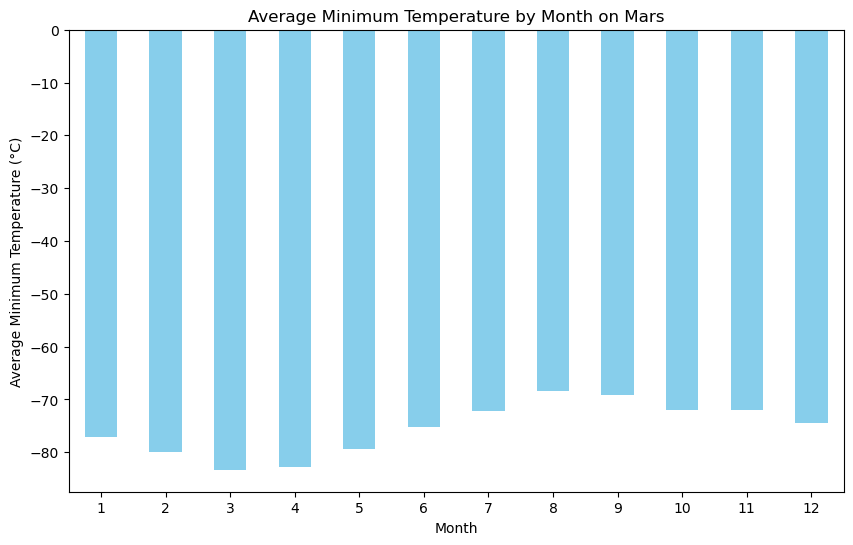

In [51]:
# Plot the average minimum temperature by month

# Group the data by month and calculate the mean of the minimum temperatures
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xticks(rotation=0)
plt.show()

In [54]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the results
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()
sorted_avg_min_temp_by_month

# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp_by_month.idxmin()
hottest_month = sorted_avg_min_temp_by_month.idxmax()

print(coldest_month)
print(hottest_month)

3
8


In [55]:
# 4. What is the average pressure by month?
avg_pressure_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

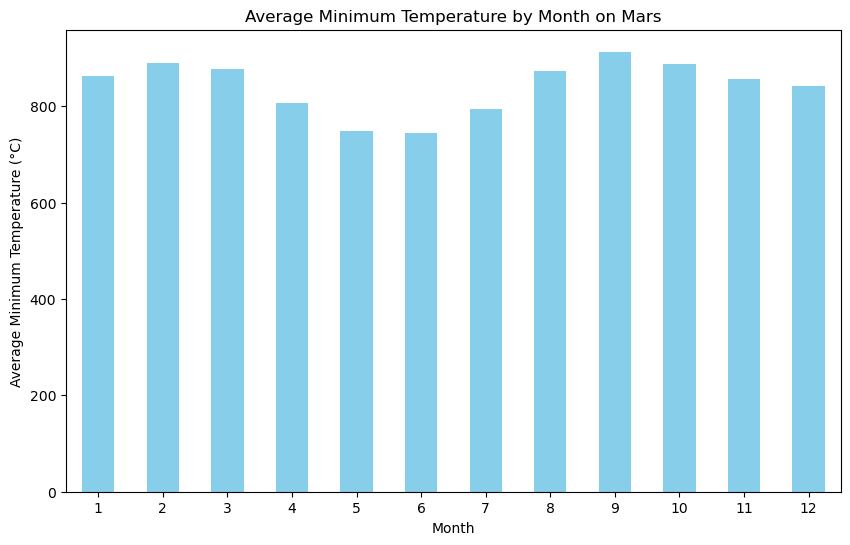

In [56]:
# Plot the average pressure by month
# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_pressure_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xticks(rotation=0)
plt.show()

In [58]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the results
sorted_avg_pressure_by_month = avg_pressure_month.sort_values()
sorted_avg_pressure_by_month

# Identify the coldest and hottest months
least_pressure_month = sorted_avg_pressure_by_month.idxmin()
most_pressure_month = sorted_avg_pressure_by_month.idxmax()

print(least_pressure_month)
print(most_pressure_month)

6
9


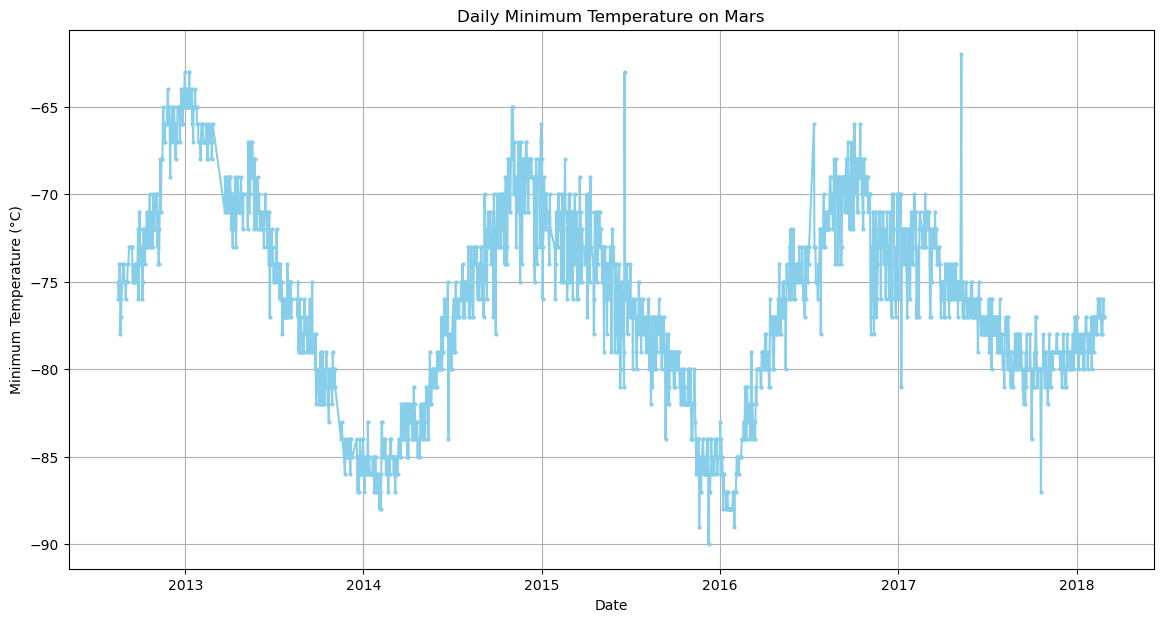

The number of terrestrial (Earth) days is 686 days.


In [62]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature for each observation
plt.figure(figsize=(14, 7))
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], marker='o', linestyle='-', markersize=2, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)
plt.show()


# Define the start and end dates
start_date = pd.to_datetime('2013-08-01')
end_date = pd.to_datetime('2015-06-18')

# Calculate the number of days between the two dates
num_days = (end_date - start_date).days

print(f"The number of terrestrial (Earth) days is {num_days} days.")

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv')

In [ ]:
browser.quit()